Importar csv de dados

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from catboost import CatBoostClassifier
import pickle

df = pd.read_csv("../../../Files/df_to_train.csv")
df['Total_Review'] = df['Total_Review'].fillna('')
df.head(5)

,Total_Review,review_type
0,Location excellent rooms extremely comfortable...,positive
1,comfortable bed excellent air con great locati...,positive
2,views,positive
3,Clean comfortable room Kettle selection tea ba...,positive
4,Beds comfy staff lovely food amazing room spac...,positive


Criar objeto TD-IDF Vetorizer

In [2]:
tfidf_vect = TfidfVectorizer(max_features=10000, ngram_range=(1, 1))
tfidf_vect.fit(df.Total_Review)

with open('tfidf_vectorizer_cb.pkl', 'wb') as f:
    pickle.dump(tfidf_vect, f)

text_vect = tfidf_vect.transform(df.Total_Review)

Mapear os valores para numéricos e dividir os dados em conjunto de treinamento e teste

In [3]:
X = text_vect
y = df['review_type']
y = y.map({'positive': 2, 'neutral': 1, 'negative': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Instanciar modelo cat boost

In [4]:
catboost = CatBoostClassifier(iterations=1000, learning_rate=0.05, depth=6, verbose=100, random_seed=42)

Treino

In [5]:
catboost.fit(X_train, y_train)

0:	learn: 1.0805619	total: 517ms	remaining: 8m 36s
100:	learn: 0.7302866	total: 30.1s	remaining: 4m 27s
200:	learn: 0.6578568	total: 1m	remaining: 4m
300:	learn: 0.6161911	total: 1m 30s	remaining: 3m 29s
400:	learn: 0.5918912	total: 2m	remaining: 3m
500:	learn: 0.5754218	total: 2m 31s	remaining: 2m 30s
600:	learn: 0.5630485	total: 3m 1s	remaining: 2m
700:	learn: 0.5537142	total: 3m 31s	remaining: 1m 30s
800:	learn: 0.5467767	total: 4m 2s	remaining: 1m
900:	learn: 0.5401900	total: 4m 32s	remaining: 30s
999:	learn: 0.5345701	total: 5m 2s	remaining: 0us


Teste

In [6]:
y_pred = catboost.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7557868572316296


In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.85      0.75      2112
           1       0.77      0.60      0.68      2157
           2       0.85      0.82      0.83      2168

    accuracy                           0.76      6437
   macro avg       0.76      0.76      0.75      6437
weighted avg       0.77      0.76      0.75      6437



Matriz de confusão

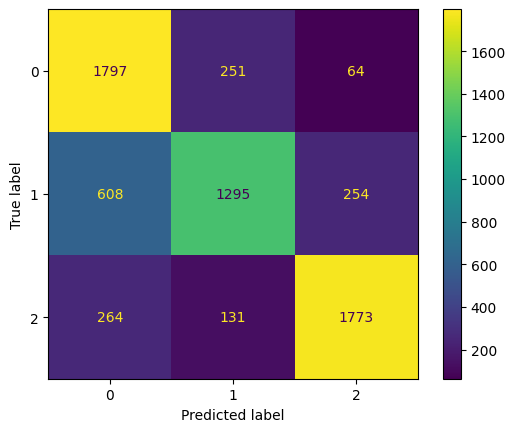

In [8]:
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Salvar modelo

In [9]:
with open('catboost_model.pkl', 'wb') as f:
    pickle.dump(catboost, f)